In [522]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [523]:
btc = pd.read_csv('BTC-USD.csv')
eth = pd.read_csv('ETH-USD.csv')
spy = pd.read_csv('SPY.csv')

In [524]:
spy['Date']

0       2019-04-15
1       2019-04-16
2       2019-04-17
3       2019-04-18
4       2019-04-22
           ...    
1253    2024-04-08
1254    2024-04-09
1255    2024-04-10
1256    2024-04-11
1257    2024-04-12
Name: Date, Length: 1258, dtype: object

## Data preprocessing

### Convert column name to perspective column name

In [525]:
btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [526]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,5096.586426,10823289598
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,5167.722168,10391952498
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061
3,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677


In [527]:
#Check for any missing data
print(btc.isna().sum())
print(eth.isna().sum())
print(spy.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [528]:
for i in btc.columns:
    if i != 'Date':
        btc['btc' +i] = btc[i]
        btc = btc.drop(i, axis = 1)

In [529]:
for i in eth.columns:
    if i != 'Date':
        eth['eth' +i] = eth[i]
        eth = eth.drop(i, axis = 1)

In [530]:
for i in spy.columns:
    if i != 'Date':
        spy['spy' +i] = spy[i]
        spy = spy.drop(i, axis = 1)

In [531]:
eth.columns

Index(['Date', 'ethOpen', 'ethHigh', 'ethLow', 'ethClose', 'ethAdj Close',
       'ethVolume'],
      dtype='object')

In [532]:
spy.columns

Index(['Date', 'spyOpen', 'spyHigh', 'spyLow', 'spyClose', 'spyAdj Close',
       'spyVolume'],
      dtype='object')

https://realpython.com/pandas-merge-join-and-concat/

In [533]:
df = pd.merge(btc, eth, on = ["Date"])

In [534]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,5096.586426,10823289598,164.622849,166.362427,163.011856,164.513351,164.513351,4959301561
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,5167.722168,10391952498,164.476089,168.591034,162.781479,167.838516,167.838516,4846298303
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061,167.897476,168.818451,159.555740,161.574173,161.574173,5672311824
3,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197,161.526550,167.666321,160.888748,167.623444,167.623444,5180105341
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677,167.553696,168.938583,165.501892,166.950760,166.950760,5596102715


In [535]:
df = pd.merge(df, spy, on = ['Date'])

In [536]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume
0,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061,167.897476,168.818451,159.555740,161.574173,161.574173,5672311824,290.239990,290.350006,289.079987,289.970001,267.572266,49596700
1,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197,161.526550,167.666321,160.888748,167.623444,167.623444,5180105341,290.950012,291.010010,289.500000,290.160004,267.747620,52153200
2,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677,167.553696,168.938583,165.501892,166.950760,166.950760,5596102715,291.399994,291.429993,288.989990,289.450012,267.092377,58268300
3,2019-04-18,5251.480469,5319.986328,5250.506836,5298.385742,5298.385742,13256489918,166.913208,175.365326,166.672119,173.814026,173.814026,6971581464,290.100006,290.320007,288.660004,290.019989,267.618439,68708500
4,2019-04-22,5312.494629,5422.687500,5280.276855,5399.365234,5399.365234,14601631648,170.017487,173.069122,168.729553,171.874664,171.874664,6094878077,289.170013,290.440002,289.070007,290.269989,267.849091,40160100


In [537]:
btc.shape

(1828, 7)

In [538]:
spy.shape

(1258, 7)

In [539]:
df.shape

(1258, 19)

In [540]:
df.shape

(1258, 19)

In [541]:
# Remove all string value for convertion Date to float
dateColumn = df["Date"]
df["Date"] = df["Date"].str.replace("-",'')
df["Date"] = pd.to_numeric(df['Date'], errors='coerce',downcast="integer")


In [542]:
print(df.dtypes)

Date              int32
btcOpen         float64
btcHigh         float64
btcLow          float64
btcClose        float64
btcAdj Close    float64
btcVolume         int64
ethOpen         float64
ethHigh         float64
ethLow          float64
ethClose        float64
ethAdj Close    float64
ethVolume         int64
spyOpen         float64
spyHigh         float64
spyLow          float64
spyClose        float64
spyAdj Close    float64
spyVolume         int64
dtype: object


In [543]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume
0,20190415,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061,167.897476,168.818451,159.555740,161.574173,161.574173,5672311824,290.239990,290.350006,289.079987,289.970001,267.572266,49596700
1,20190416,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197,161.526550,167.666321,160.888748,167.623444,167.623444,5180105341,290.950012,291.010010,289.500000,290.160004,267.747620,52153200
2,20190417,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677,167.553696,168.938583,165.501892,166.950760,166.950760,5596102715,291.399994,291.429993,288.989990,289.450012,267.092377,58268300
3,20190418,5251.480469,5319.986328,5250.506836,5298.385742,5298.385742,13256489918,166.913208,175.365326,166.672119,173.814026,173.814026,6971581464,290.100006,290.320007,288.660004,290.019989,267.618439,68708500
4,20190422,5312.494629,5422.687500,5280.276855,5399.365234,5399.365234,14601631648,170.017487,173.069122,168.729553,171.874664,171.874664,6094878077,289.170013,290.440002,289.070007,290.269989,267.849091,40160100


In [544]:
#Split the data for predicting High

In [545]:
import random

x_train = df
y = df['btcHigh']
header = x_train.columns

# remove header for shuffling 
x_data = x_train.values

random.seed(123)
#Split 70% for train data, and 30% for test data
train_ratio = 0.7
test_ratio = 1 - train_ratio

total_data_sample = len(x_train)
train_samples = int(total_data_sample * train_ratio)
test_samples = total_data_sample - train_samples

#print(X)
random.shuffle(x_data)
shuffled_data = pd.DataFrame(x_data, columns=header)

train_data = shuffled_data.head(train_samples)
test_data = shuffled_data.head(test_samples)

# Split the data into training subsets
X_train_btcHigh = train_data.drop(columns=['btcHigh'])
y_train_btcHigh = train_data['btcHigh']

# Split the data into test subsets
X_test_btcHigh = test_data.drop(columns=['btcHigh'])
y_test_btcHigh = test_data['btcHigh']

In [546]:
#Split the data for prediciting Low

In [547]:
x_train = df
y = df['btcLow']
header = x_train.columns

# remove header for shuffling 
x_data = x_train.values

random.seed(123)
#Split 70% for train data, and 30% for test data
train_ratio = 0.7
test_ratio = 1 - train_ratio

total_data_sample = len(x_train)
train_samples = int(total_data_sample * train_ratio)
test_samples = total_data_sample - train_samples

#print(X)
random.shuffle(x_data)
shuffled_data = pd.DataFrame(x_data, columns=header)

train_data = shuffled_data.head(train_samples)
test_data = shuffled_data.head(test_samples)

# Split the data into training subsets
X_train_btcLow = train_data.drop(columns=['btcLow'])
y_train_btcLow = train_data['btcLow']

# Split the data into test subsets
X_test_btcLow = test_data.drop(columns=['btcLow'])
y_test_btcLow = test_data['btcLow']

In [548]:
X_train_btcLow.shape


(880, 18)

In [549]:
# Hyper parameters 
X_train_btcLow_array = X_train_btcLow.to_numpy()
X_train_btcHigh_array = X_train_btcHigh.to_numpy()

btcLowWeights = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
btcHighWeights = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  

w0_btcLow = 0
w0_btcHigh = 0

newBtcLowWeights = [] 
newBtcHighWeights = []

newBtcHighW0 = 0 
newBtcLowW0 = 0

alpha = 50 # learning rate

m1 = len(y_train_btcLow)
m2 = len(y_train_btcHigh)

num_of_iteration = 100

In [550]:
# Linear Regression from scratch for predicting high, I'm going to add regularization to this - Guiller

In [551]:
 for idx in range (10): 
    for i in range (m1):
        summation = []
        xi = X_train_btcHigh_array[i, :]
        y_pred_btcHigh = newBtcHighW0
        for k in range (17):
            y_pred_btcHigh += btcHighWeights[k] * xi[k]
        summation.append(y_pred_btcHigh - y_train_btcHigh)

        derivative = 2/m2 * sum(summation)
        newBtcHighW0 = w0_btcHigh - (alpha * derivative)

    for j in range (17):
        for i in range (m2): 
            summation = []
            xi = X_train_btcHigh_array[i, :]
            y_pred_btcHigh = newBtcHighW0 
            for k in range (17):
                y_pred_btcHigh += btcHighWeights[k] * xi[k]  

            summation.append(y_pred_btcHigh - y_train_btcHigh)
        derivative = 2/m2 * sum(summation)
        newBtcHighWeights.append(btcHighWeights[j] - (alpha * derivative))    
        
    #The previous iteration 
    last_17 = newBtcHighWeights[-17:]

    #Assigning new weight values to old weights
    for n in range (17):
        newBtcHighWeights[n] = last_17[n]
    w0_btcHigh = newBtcHighW0
    
    #next iteration

final_weights = newBtcHighWeights[:17]
    

In [552]:
y_train_btcHigh.shape

(880,)

In [553]:
y_pred_btcHigh.shape

(880,)

In [554]:
X_train_btcHigh.shape

(880, 18)

In [555]:
from sklearn.metrics import r2_score
r2_score(y_train_btcHigh, y_pred_btcHigh)

0.7430744918996226

In [556]:
pd.options.mode.chained_assignment = None  #Hide warning

X_train_btcHigh["Date"]
X_train_btcHigh['Date'] = X_train_btcHigh['Date'].astype(str)

for k in range (len(X_train_btcHigh["Date"])):
    size = len(X_train_btcHigh["Date"][k])
    string = X_train_btcHigh["Date"][k]
    substring_to_remove = ".0"
    X_train_btcHigh['Date'][k] = string.replace(substring_to_remove, "")
    
for k in range (len(X_train_btcHigh["Date"])):
    size = len(X_train_btcHigh["Date"][k])
    string = X_train_btcHigh["Date"][k]
    X_train_btcHigh['Date'][k] = string[:4] + "-" + string[4:]
    #print(result)
    
for k in range (len(X_train_btcHigh["Date"])):
    size = len(X_train_btcHigh["Date"][k])
    string = X_train_btcHigh["Date"][k]
    X_train_btcHigh['Date'][k] = string[:7] + "-" + string[7:]


In [557]:
#Actual and predicted difference
prediction_mse_df = pd.DataFrame({ 'Date': X_train_btcHigh['Date'], 'Actual High': y_train_btcHigh, 'Predicted High': y_pred_btcHigh, 'Difference': round(abs(y_train_btcHigh - y_pred_btcHigh),2)})
prediction_mse_df[0:20]

,Date,Actual High,Predicted High,Difference
0,2019-04-15,5196.606934,3425.332586,1771.27
1,2019-04-15,5196.606934,3425.332586,1771.27
2,2019-04-15,5196.606934,3425.332586,1771.27
3,2019-04-17,5274.275391,3476.527587,1797.75
4,2019-04-22,5422.687500,3574.353118,1848.33
5,2019-04-22,5422.687500,3574.353118,1848.33
6,2019-04-15,5196.606934,3425.332586,1771.27
7,2019-04-25,5542.238281,3653.154765,1889.08
8,2019-04-16,5238.945313,3453.239840,1785.71
9,2019-04-18,5319.986328,3506.657856,1813.33


<function matplotlib.pyplot.show(close=None, block=None)>

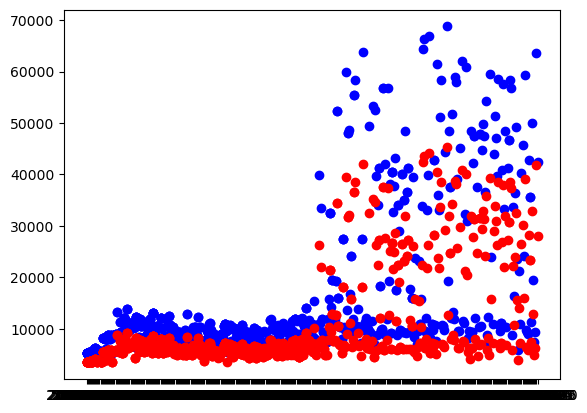

In [558]:
import matplotlib.pyplot as plt
plt.scatter(X_train_btcHigh['Date'], y_train_btcHigh, color = 'b')
plt.scatter(X_train_btcHigh['Date'], y_pred_btcHigh, color = 'r')
plt.show

When merged, around 600 or 30% of data got lost

## Graph - 
Guiller - I'm getting a conversion issue when computing the linear regression, so I converted the date to integer. That's why the graph is messed up. No need to fix the graph below, we will replace those with actual and prediction 

In [559]:
df['DATE'] = pd.to_datetime(df['Date'])

<Axes: xlabel='DATE', ylabel='ethOpen'>

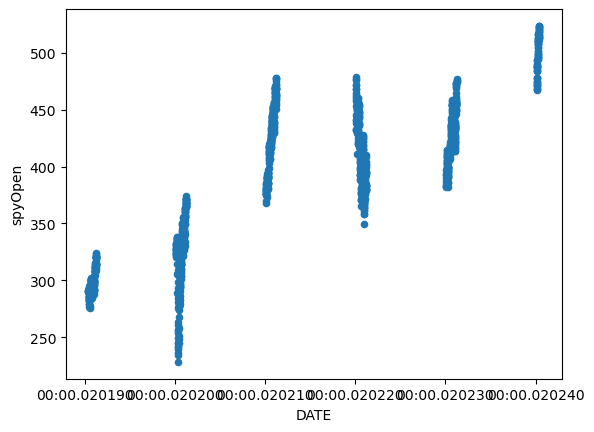

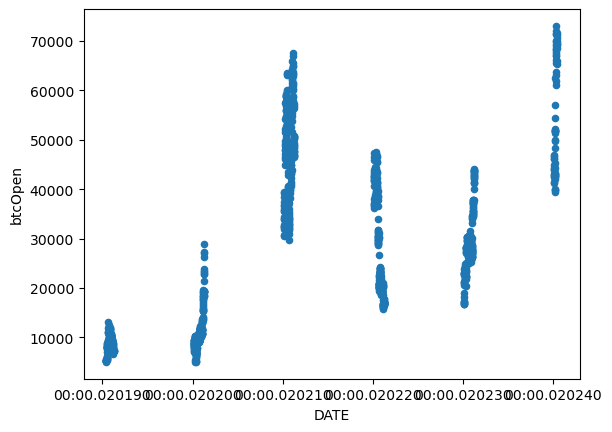

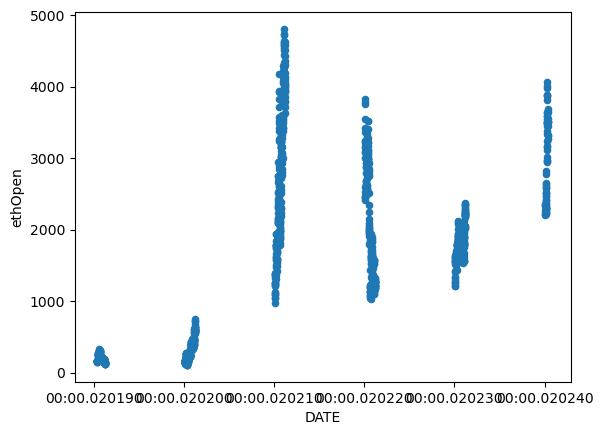

In [560]:
df.plot(x = 'DATE', y = 'spyOpen', kind = 'scatter')
df.plot(x = 'DATE', y = 'btcOpen', kind = 'scatter')
df.plot(x = 'DATE', y = 'ethOpen', kind = 'scatter')

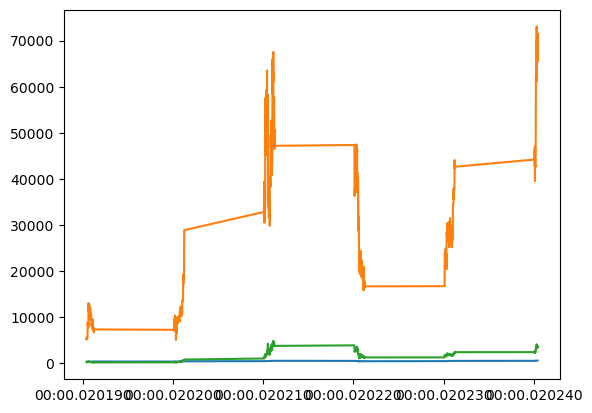

In [561]:
plt.plot(df['DATE'], df['spyOpen'], label = 'Spy Open')
plt.plot(df['DATE'], df['btcOpen'], label = 'Bitcoin Open')
plt.plot(df['DATE'], df['ethOpen'], label = 'Ethererum Open')
plt.show()

Emphasize the need to normalization data, otherwise we cannot compare them

# Normalize data

In [562]:
des = df.describe()

In [563]:
exception = ['Date', 'DATE']

In [564]:
for col in df.columns:
    if col not in exception:
        df[col] = (df[col] - des[col]['min']) / (des[col]['max'] - des[col]['min'])

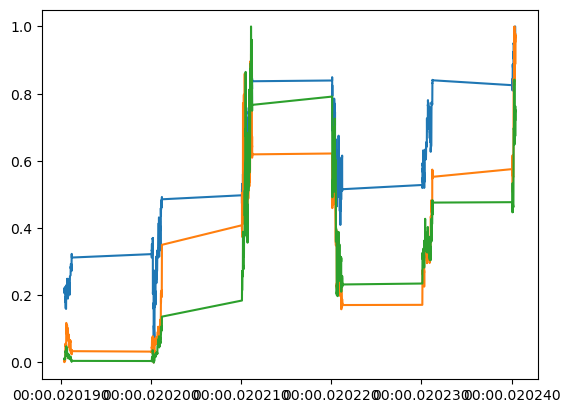

In [565]:
plt.plot(df['DATE'], df['spyOpen'], label = 'Spy Open')
plt.plot(df['DATE'], df['btcOpen'], label = 'Bitcoin Open')
plt.plot(df['DATE'], df['ethOpen'], label = 'Ethererum Open')
plt.show()